In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [56]:
#create data frame
list_2dim = [[100112,"Jim Collins","Wifo",4],[120095,"Martin Schrader","Wifo",7],[180331,"Achim Zahn","OMM",1],
            [100113,"Joan Collins","Wifo",5],[120096,"Martin Scorsese","ID",6],[180332,"Achim Loewer","OMM",3],
            [100114,"Jim Beam","Wifo",4],[120097,"Tim Schrader","Wifo",7],[180333,"Zacharias Maier","OMM",5]]

df = pd.DataFrame(list_2dim, columns=['ID','Name','FoS','Semesters'])
df

,ID,Name,FoS,Semesters
0,100112,Jim Collins,Wifo,4
1,120095,Martin Schrader,Wifo,7
2,180331,Achim Zahn,OMM,1
3,100113,Joan Collins,Wifo,5
4,120096,Martin Scorsese,ID,6
5,180332,Achim Loewer,OMM,3
6,100114,Jim Beam,Wifo,4
7,120097,Tim Schrader,Wifo,7
8,180333,Zacharias Maier,OMM,5


# One Hot Encoding

In [57]:
#one hot encoding of field of study
######## add line of code here ##########################
fos_oh_encoded = pd.get_dummies(df['FoS'], dtype=int)
fos_oh_encoded

,ID,OMM,Wifo
0,0,0,1
1,0,0,1
2,0,1,0
3,0,0,1
4,1,0,0
5,0,1,0
6,0,0,1
7,0,0,1
8,0,1,0


In [58]:
#join new features to original data frame and store result in df_oh
df_oh = pd.concat([df, fos_oh_encoded], axis=1)
df_oh

,ID,Name,FoS,Semesters,ID,OMM,Wifo
0,100112,Jim Collins,Wifo,4,0,0,1
1,120095,Martin Schrader,Wifo,7,0,0,1
2,180331,Achim Zahn,OMM,1,0,1,0
3,100113,Joan Collins,Wifo,5,0,0,1
4,120096,Martin Scorsese,ID,6,1,0,0
5,180332,Achim Loewer,OMM,3,0,1,0
6,100114,Jim Beam,Wifo,4,0,0,1
7,120097,Tim Schrader,Wifo,7,0,0,1
8,180333,Zacharias Maier,OMM,5,0,1,0


In [59]:
#Summarize the number of students per Field of Study in df_sum
df_sum = df_oh.groupby('FoS').size().reset_index(name='Number of Students')
df_sum

,FoS,Number of Students
0,ID,1
1,OMM,3
2,Wifo,5


<Axes: xlabel='FoS', ylabel='Number of Students'>

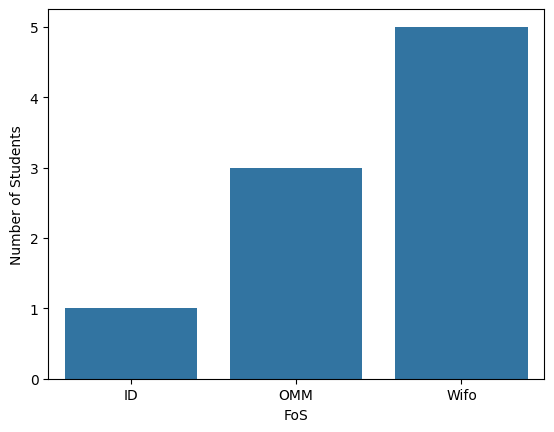

In [60]:
#display the number of students per field of study in a bar chart
sns.barplot(x='FoS', y='Number of Students', data=df_sum)

# Target Encoding

In [61]:
#display the values of your original data frame again (the one without one hot encoding)
df

,ID,Name,FoS,Semesters
0,100112,Jim Collins,Wifo,4
1,120095,Martin Schrader,Wifo,7
2,180331,Achim Zahn,OMM,1
3,100113,Joan Collins,Wifo,5
4,120096,Martin Scorsese,ID,6
5,180332,Achim Loewer,OMM,3
6,100114,Jim Beam,Wifo,4
7,120097,Tim Schrader,Wifo,7
8,180333,Zacharias Maier,OMM,5


In [62]:
#Use "Semesters" as the target and apply target encoding to the feature "field of study"
#First step: calculate the mean number of semesters per "field of study"
mean_semesters_encode = df.groupby('FoS')['Semesters'].mean().reset_index(name='Mean Semesters')
mean_semesters_encode

,FoS,Mean Semesters
0,ID,6.0
1,OMM,3.0
2,Wifo,5.4


In [63]:
#Create a new column for your data frame called 'Target Encoded FoS' and map the mean number of semesters, which you just calculated to this column
df_oh = pd.merge(df_oh, mean_semesters_encode, on='FoS')
df_oh

,ID,Name,FoS,Semesters,ID,OMM,Wifo,Mean Semesters
0,100112,Jim Collins,Wifo,4,0,0,1,5.4
1,120095,Martin Schrader,Wifo,7,0,0,1,5.4
2,180331,Achim Zahn,OMM,1,0,1,0,3.0
3,100113,Joan Collins,Wifo,5,0,0,1,5.4
4,120096,Martin Scorsese,ID,6,1,0,0,6.0
5,180332,Achim Loewer,OMM,3,0,1,0,3.0
6,100114,Jim Beam,Wifo,4,0,0,1,5.4
7,120097,Tim Schrader,Wifo,7,0,0,1,5.4
8,180333,Zacharias Maier,OMM,5,0,1,0,3.0


In [64]:
#Drop new column again 
df_oh.drop('Mean Semesters', axis=1, inplace=True)

# Ordinal Encoding

In [65]:
#Create a function that receives a string argument and returns the rank of the first character
#Example: Achim => 'A' => 1, Bernd => 'B' => 2 etc.
#Hint: the "ord" command could be helpful
def return_rank(name):
    return ord(name[0].upper()) - 64

In [66]:
#loop the names in your data frame, call the rank function you just created and store the results in a list
rank_list = df_oh['Name'].apply(return_rank)
rank_list

0    10
1    13
2     1
3    10
4    13
5     1
6    10
7    20
8    26
Name: Name, dtype: int64

In [67]:
#create a new column of your dataframe, which stores the values of the list you just created
######## add line(s) of code here ##########################
df_oh['Rank'] = rank_list

# Binning

In [68]:
#Apply binning to the name ranks which you just created
#There should be two bins
######## add line(s) of code here ##########################
df_oh['Rank'] = pd.cut(df_oh['Rank'], bins=2)
df_oh

,ID,Name,FoS,Semesters,ID,OMM,Wifo,Rank
0,100112,Jim Collins,Wifo,4,0,0,1,"(0.975, 13.5]"
1,120095,Martin Schrader,Wifo,7,0,0,1,"(0.975, 13.5]"
2,180331,Achim Zahn,OMM,1,0,1,0,"(0.975, 13.5]"
3,100113,Joan Collins,Wifo,5,0,0,1,"(0.975, 13.5]"
4,120096,Martin Scorsese,ID,6,1,0,0,"(0.975, 13.5]"
5,180332,Achim Loewer,OMM,3,0,1,0,"(0.975, 13.5]"
6,100114,Jim Beam,Wifo,4,0,0,1,"(0.975, 13.5]"
7,120097,Tim Schrader,Wifo,7,0,0,1,"(13.5, 26.0]"
8,180333,Zacharias Maier,OMM,5,0,1,0,"(13.5, 26.0]"


In [69]:
#show different bins
df_oh['Rank'].unique()

[(0.975, 13.5], (13.5, 26.0]]
Categories (2, interval[float64, right]): [(0.975, 13.5] < (13.5, 26.0]]

# Visual Normality Checks

<Axes: ylabel='Frequency'>

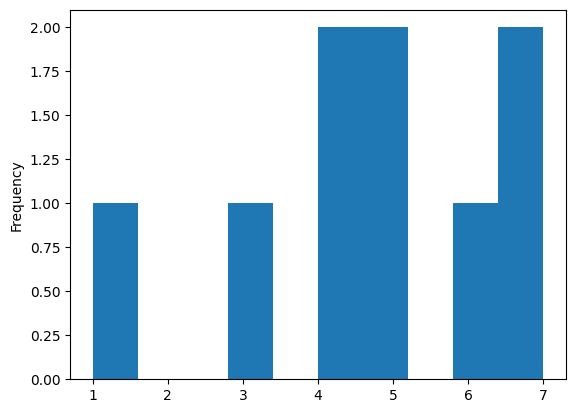

In [70]:
#create a histogram plot for the column "Semesters"
df['Semesters'].plot(kind='hist')

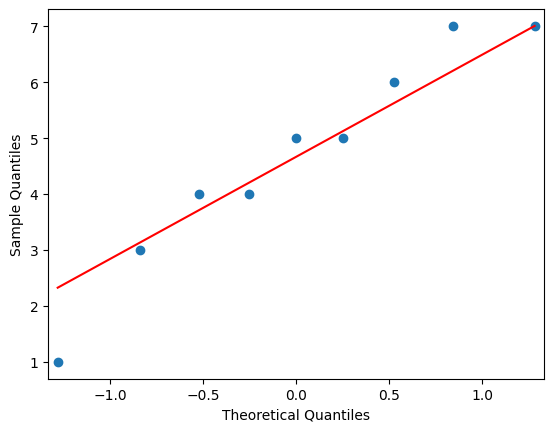

In [71]:
#create a qq plot for the column "Semesters"
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

######## add line(s) of code here ##########################
x = df['Semesters'].values
qqplot(x, line='s')
pyplot.show()

# Statistical Normality Checks

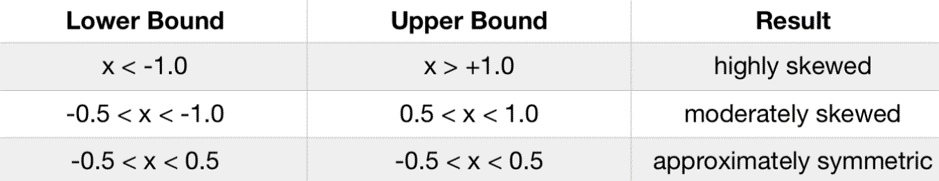

In [78]:
#Calculate skew for the column "Semesters"
skew = df_oh['Semesters'].skew()
skew

np.float64(-0.5901688908506545)

In [73]:
# Shapiro-Wilk Test
from scipy.stats import shapiro

def shapiro_wilk_test(data,alpha):
    stat, p = shapiro(data)
    print('Statistics=%.3f, p=%.5f' % (stat, p))
    # interpret
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')      

In [79]:
#Perform Shapiro-Wilk Test for the column "Semesters"
alpha = 0.05
shapiro_wilk_test(df_oh['Semesters'],alpha)

Statistics=0.944, p=0.62039
Sample looks Gaussian (fail to reject H0)


# Transform to normal distribution - Quantile Transformer

In [75]:
from sklearn.preprocessing import QuantileTransformer

/Users/JOHTORR/Repos/classroom_notes/.venv/lib/python3.13/site-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (25) is greater than the total number of samples (9). n_quantiles is set to n_samples.
  warnings.warn(


<Axes: >

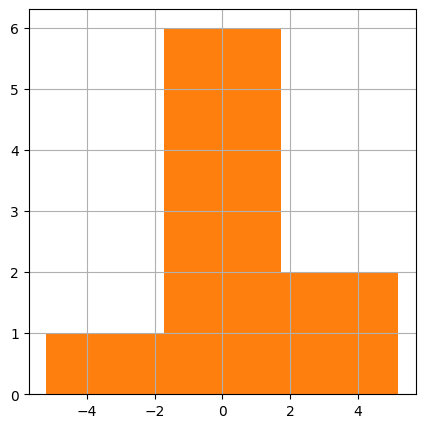

In [80]:
#perform quantile transformation for the column "Semesters" and plot the result in a histogram
#quantile transformer should use 5 quantiles
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(n_quantiles=25, output_distribution='normal',random_state=0)
trans_x=qt.fit_transform(np.array(df_oh['Semesters'].array.reshape(-1, 1)))

df_oh['Semesters']=trans_x

df_oh['Semesters'].hist(bins=20,figsize=(5, 5))

#histogram should use 3 bins
df_oh['Semesters'].hist(bins=3)

In [81]:
df_oh

,ID,Name,FoS,Semesters,ID,OMM,Wifo,Rank
0,100112,Jim Collins,Wifo,-0.488776,0,0,1,"(0.975, 13.5]"
1,120095,Martin Schrader,Wifo,5.199338,0,0,1,"(0.975, 13.5]"
2,180331,Achim Zahn,OMM,-5.199338,0,1,0,"(0.975, 13.5]"
3,100113,Joan Collins,Wifo,0.157311,0,0,1,"(0.975, 13.5]"
4,120096,Martin Scorsese,ID,0.674490,1,0,0,"(0.975, 13.5]"
5,180332,Achim Loewer,OMM,-1.150349,0,1,0,"(0.975, 13.5]"
6,100114,Jim Beam,Wifo,-0.488776,0,0,1,"(0.975, 13.5]"
7,120097,Tim Schrader,Wifo,5.199338,0,0,1,"(13.5, 26.0]"
8,180333,Zacharias Maier,OMM,0.157311,0,1,0,"(13.5, 26.0]"
